In [1]:
# @everywhere used for the implementation of the modules across multiple workers
# Without it, the code does not run

# Add the modules to the ´read´ path of the Julia
push!(LOAD_PATH, "/scratch/users/vaydingul20/workfolder/COMP541_Project/src/modules/")


# Custom modules
using Network: HapticNet, VisualNet, train_epoch!, save_as_jld2
using TUM69: NetworkData, kfold
using Utils: a_type, notify!
# Ready-to-use modules
using JLD2, Random
using CUDA


In [2]:
# Set path
path = CUDA.functional() ? "/userfiles/vaydingul20/data/new" : "data/new" # path of the main data
DATA_PATH = isdir(path) && path
# Set pretrained network path
alexnet_PATH = "/scratch/users/vaydingul20/workfolder/COMP541_Project/alexnet.mat"

"/scratch/users/vaydingul20/workfolder/COMP541_Project/alexnet.mat"

In [19]:
nd = NetworkData(DATA_PATH, "image"; read_type = "normal", batchsize = 10, atype = a_type(Float32))

Train image data is being loaded!
Test image data is being loaded!


NetworkData(Tuple{String,Int8}[("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5529.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5530.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5531.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5532.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5533.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5534.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5535.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5536.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5537.JPG", 1), ("/userfiles/vaydingul20/data/new/train/image/G1EpoxyRasterPlate/IMG_5538.JPG", 1)  …  ("/userfiles/vaydingul20/data/new/train/image/G9TextileVersion3/IMG_6255.JPG", 69), ("/userfiles/vaydingul20/data/new/train/im

In [22]:
iterate(nd)

((K32(384,384,3,480)[0.73333335⋯], Int8[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 10)

In [20]:
# Seperate into 3 folds for training
kf = kfold(nd; fold=10)
results = []

Any[]

┣████████████████████┫ [100.00%, 126/126, 01:56:15/01:56:15, 55.36s/i] 


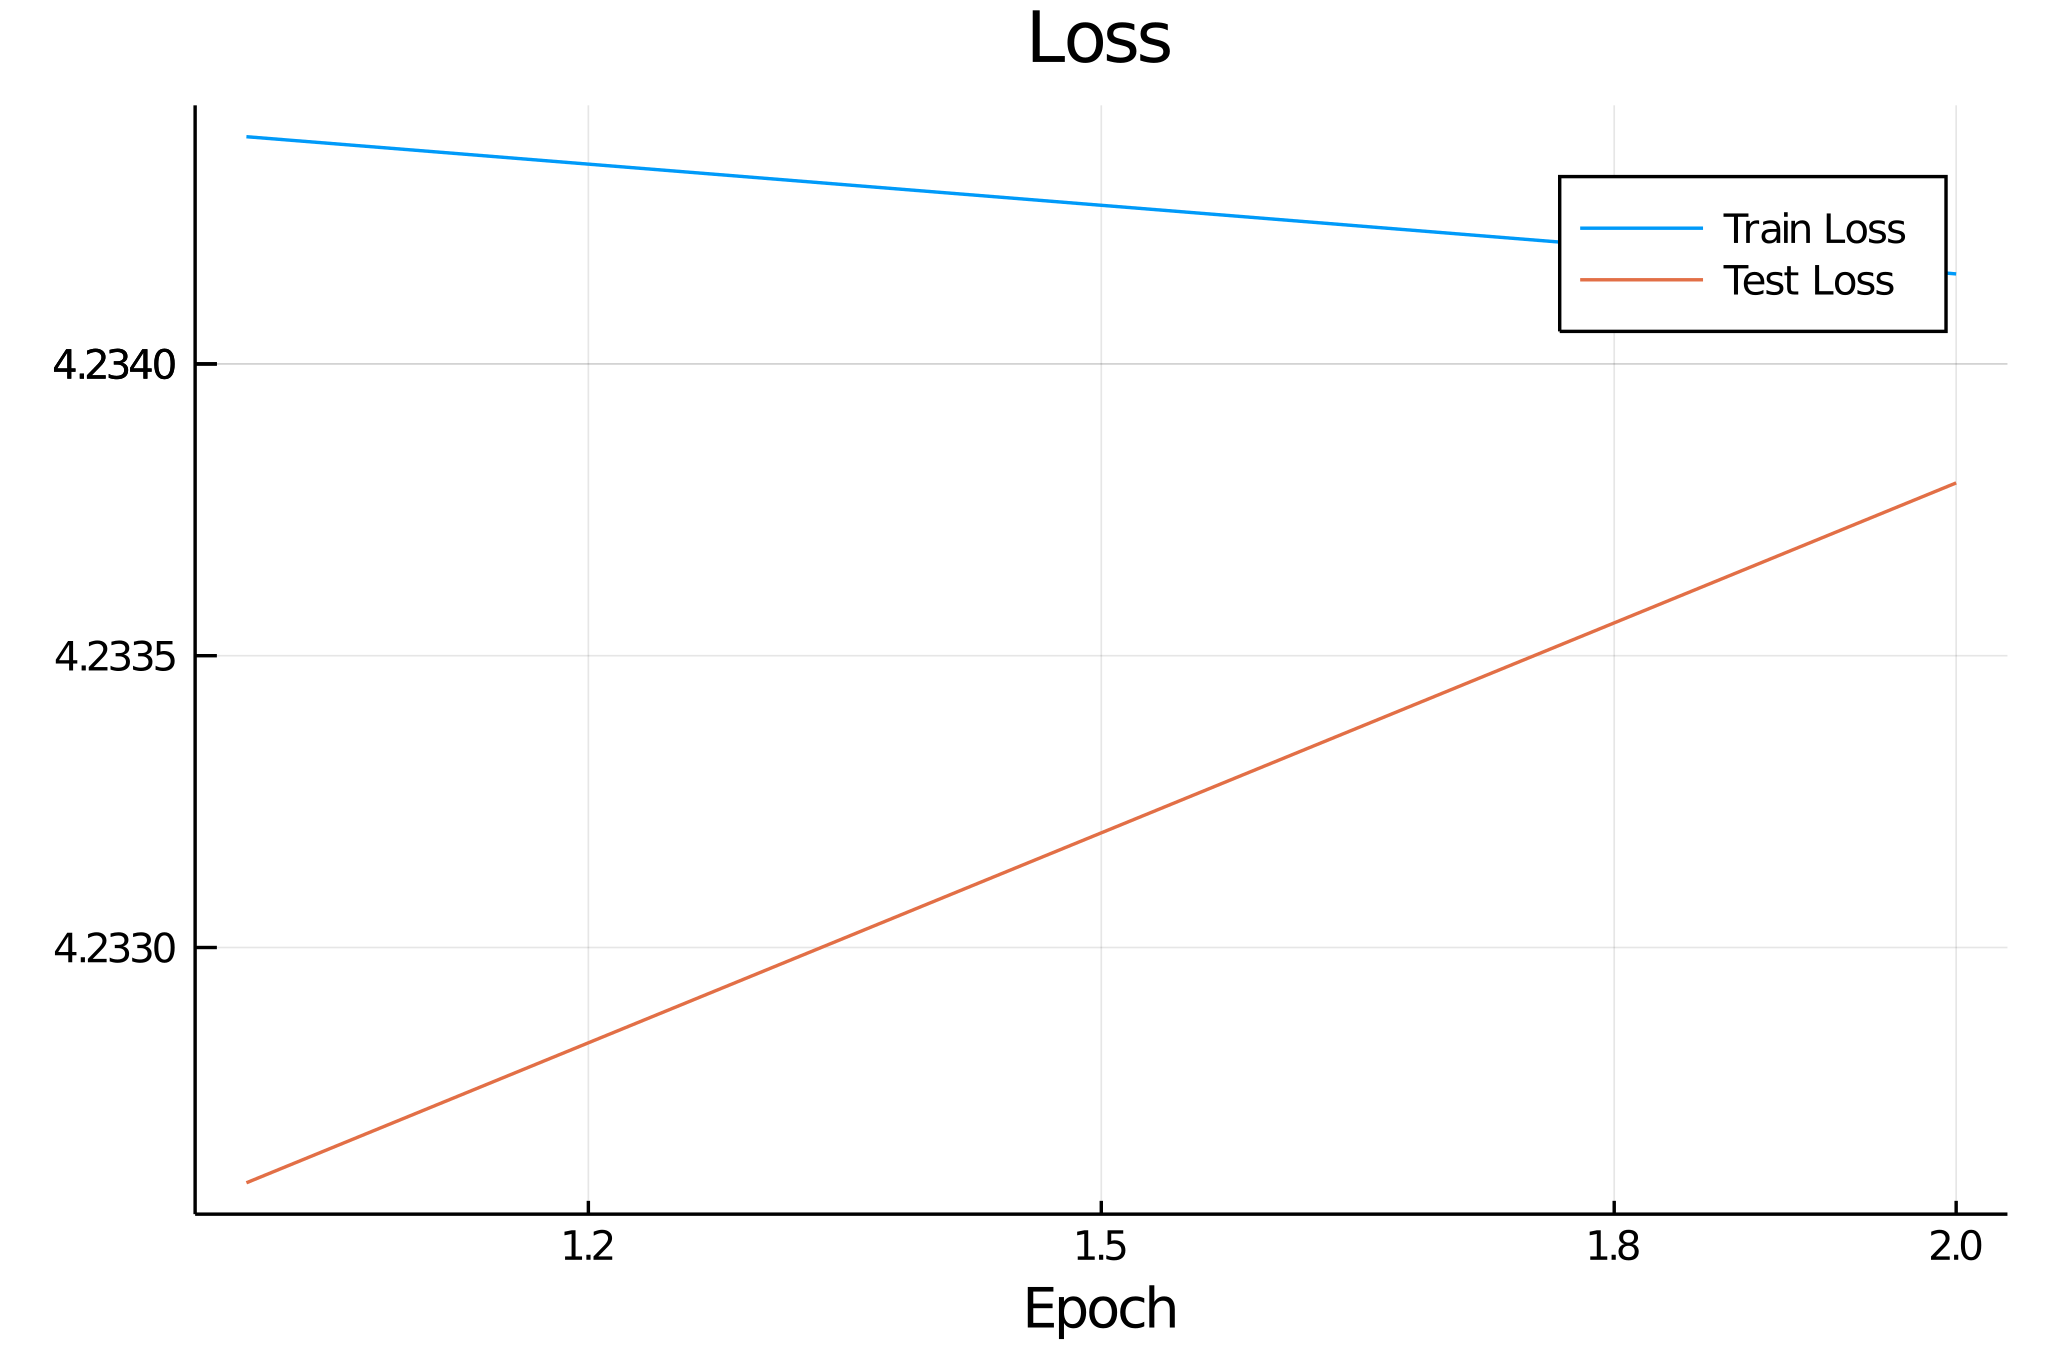

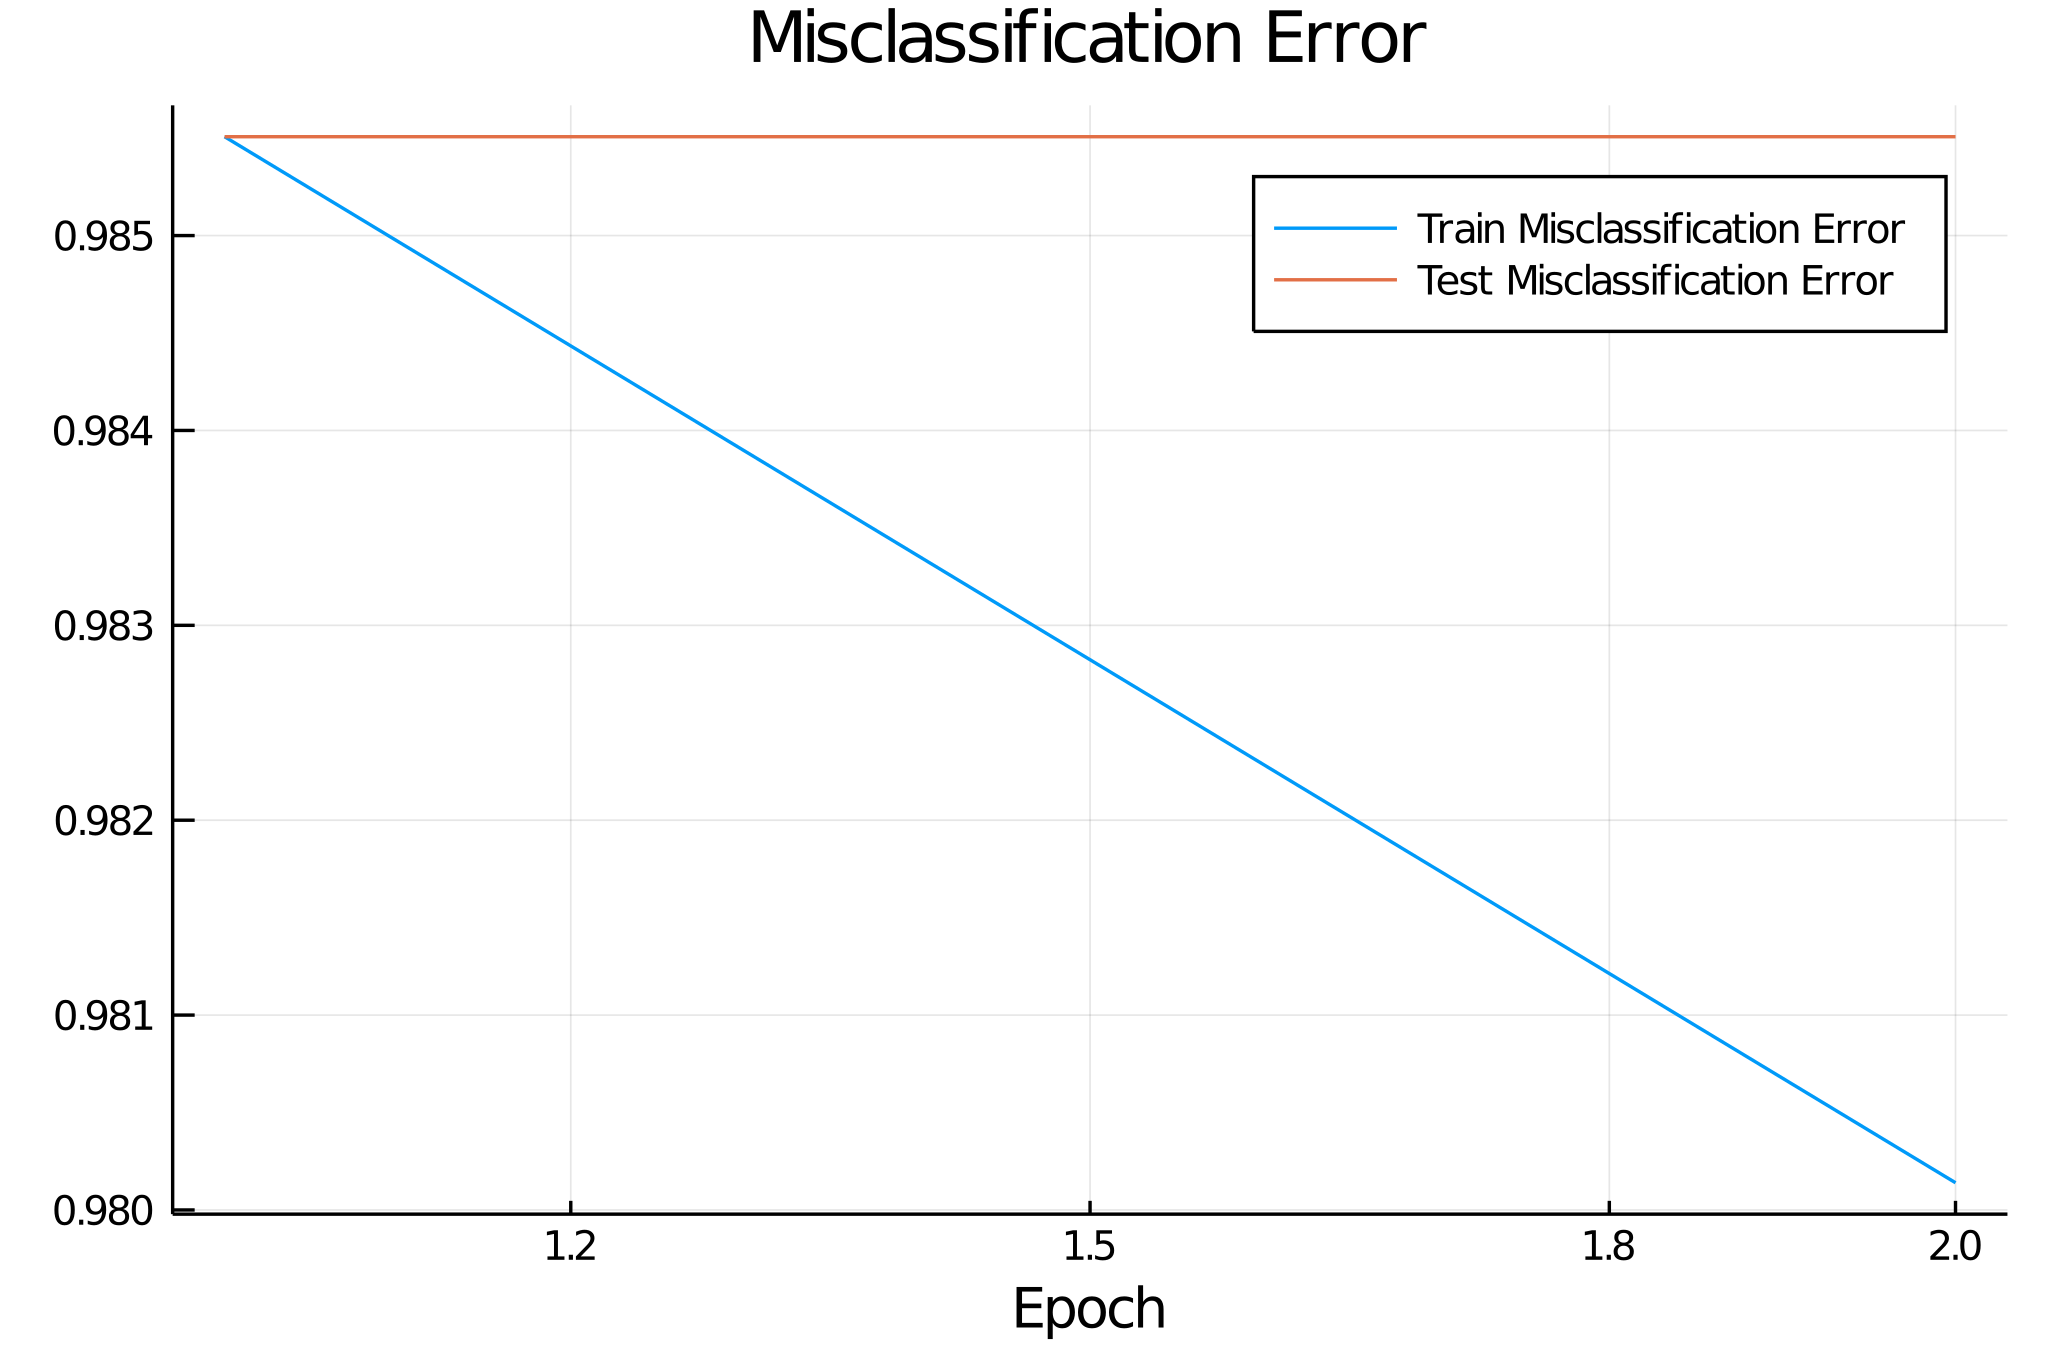

TRAINING PARAMETERS


Activation Function = relu
Optimizer Type = adam
Learning Rate = 0.0001
LAYERS:


Network.Conv ==> W = (11, 11, 3, 48)   b = (1, 1, 48, 1)
Network.Conv ==> W = (5, 5, 48, 256)   b = (1, 1, 256, 1)
Network.Conv ==> W = (3, 3, 256, 192)   b = (1, 1, 192, 1)
Network.Conv ==> W = (3, 3, 192, 192)   b = (1, 1, 192, 1)
Network.Conv ==> W = (3, 3, 192, 256)   b = (1, 1, 256, 1)
Network.Conv ==> W = (6, 6, 256, 300)   b = (1, 1, 300, 1)
Network.Conv ==> W = (1, 1, 300, 250)   b = (1, 1, 250, 1)
Network.Conv ==> W = (1, 1, 250, 69)   b = (1, 1, 69, 1)
In this network configuration,
there are total 4399749 parameters.
Final Loss
Train Loss = 4.234154
Test Loss = 4.233796


Final Misclassification Error
Train Misclassification Error = 0.98013955
Test Misclassification Error = 0.98550725


Test Accuracy = 0.014492753623188406


In [21]:
for (ix, (dtrn, dtst)) in enumerate(kf.folds[1:1])
    

    #Reset the model
    vn = VisualNet(alexnet_PATH; atype=a_type(Float32))

        # Training routine
        res = train_epoch!(vn, dtrn, dtst; progress_bar=true, fig=true, info=true, epoch=2)
        # Save model 
        # Add results to the ´results´vector
        push!(results, res)

    
    save_as_jld2(vn, "vn-$ix.jld2")

end

In [7]:
# Save accumulated results
JLD2.@save "results_vn.jld2" results = results